In [1]:
from tensorflow.keras.layers import Dense,Dropout,Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Reshape
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
import tensorflowjs as tfjs

In [54]:
IMG_HEIGHT = 64
IMG_WIDTH = 64
BATCH_SIZE = 16
EPOCHS = 60

In [61]:
path = 'C:/Users/Vikas/Documents/FinalPrj/AutismDataset/'
# train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)
train = ImageDataGenerator(
        rotation_range=25,
        fill_mode='nearest',
        width_shift_range=0.15,
        height_shift_range=0.15,
        rescale=1/255,
#         shear_range=0.15,
#         zoom_range=0.15,
        horizontal_flip=True,
        vertical_flip=True,    
#         brightness_range=[0.4,1.0]
)

train_dataset = train.flow_from_directory(path + 'train',
                                         target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          batch_size=BATCH_SIZE,
                                         class_mode='binary')
validation_dataset = validation.flow_from_directory(path + 'valid',
                                         target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          batch_size=BATCH_SIZE,
                                         class_mode='binary')

Found 2540 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [12]:
train_dataset.class_indices

{'Autistic': 0, 'Non_Autistic': 1}

In [13]:
train_dataset.image_shape

(64, 64, 3)

In [4]:
def plot_learning_curve(history, name):
    '''
    Function to plot the accuracy curve
    @param history: (history object) containing all the relevant information about the training
    @param name: (string) name of the model
    '''
    # extract informations 
    acc     = history.history["accuracy"]
    val_acc = history.history["val_accuracy"]
    loss    = history.history["loss"] 
    val_loss= history.history["val_loss"] 
    epochs  = range(1, len(acc)+1)
    # plot accuracy
    plt.plot(epochs, acc, 'b-o', label='Training acc')
    plt.plot(epochs, val_acc, 'g', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()
    # plot losses 
    plt.plot(epochs, loss, 'b-o', label='Training loss')
    plt.plot(epochs, val_loss, 'g', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show() 


In [62]:
model = tf.keras.models.Sequential()

# model.add(Reshape((IMG_HEIGHT,IMG_WIDTH,3), input_shape=(4,)))

model.add(Conv2D(32, (3,3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256, (3,3)))
model.add(Activation("relu"))

model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.2))
model.add(Activation("relu"))

model.add(Flatten())

model.add(Dense(512))
model.add(Activation("relu"))
model.add(Dropout(0.2))

model.add(Dense(1))
model.add(Activation("sigmoid"))

model.compile(loss="binary_crossentropy",
             optimizer="adam",
             metrics=["accuracy"])

In [63]:
model_fit = model.fit(train_dataset,
                      batch_size = BATCH_SIZE,
                      epochs = EPOCHS, 
                      validation_data = validation_dataset
                     )              

Epoch 1/60
159/159 [==============================] - 14s 86ms/step - loss: 0.6877 - accuracy: 0.5406 - val_loss: 0.6402 - val_accuracy: 0.7300
Epoch 2/60
159/159 [==============================] - 15s 93ms/step - loss: 0.6774 - accuracy: 0.5811 - val_loss: 0.6915 - val_accuracy: 0.5500
Epoch 3/60
159/159 [==============================] - 21s 131ms/step - loss: 0.6548 - accuracy: 0.6157 - val_loss: 0.6308 - val_accuracy: 0.6100
Epoch 4/60
159/159 [==============================] - 21s 130ms/step - loss: 0.6330 - accuracy: 0.6315 - val_loss: 0.5788 - val_accuracy: 0.7100
Epoch 5/60
159/159 [==============================] - 20s 128ms/step - loss: 0.6196 - accuracy: 0.6508 - val_loss: 0.5597 - val_accuracy: 0.7100
Epoch 6/60
159/159 [==============================] - 20s 126ms/step - loss: 0.6160 - accuracy: 0.6610 - val_loss: 0.5135 - val_accuracy: 0.7500
Epoch 7/60
159/159 [==============================] - 20s 128ms/step - loss: 0.5919 - accuracy: 0.6819 - val_loss: 0.5392 - val_accu

159/159 [==============================] - 14s 86ms/step - loss: 0.4554 - accuracy: 0.7902 - val_loss: 0.4270 - val_accuracy: 0.7800
Epoch 58/60
159/159 [==============================] - 14s 86ms/step - loss: 0.4514 - accuracy: 0.7898 - val_loss: 0.4575 - val_accuracy: 0.7700
Epoch 59/60
159/159 [==============================] - 13s 85ms/step - loss: 0.4675 - accuracy: 0.7776 - val_loss: 0.4364 - val_accuracy: 0.8600
Epoch 60/60
159/159 [==============================] - 14s 86ms/step - loss: 0.4503 - accuracy: 0.7823 - val_loss: 0.4375 - val_accuracy: 0.7900


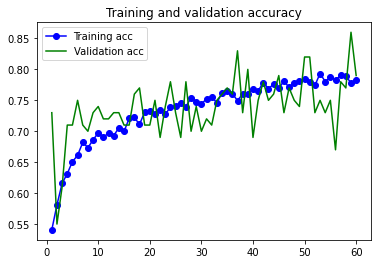

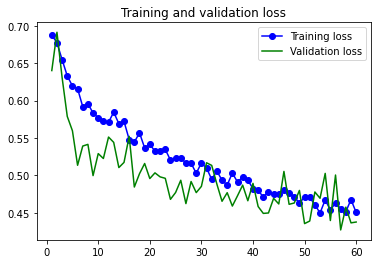

In [64]:
plot_learning_curve(model_fit, "ASD")  

In [65]:
dir_path = path + 'test'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i, target_size = (IMG_HEIGHT,IMG_WIDTH,3))
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    val = model.predict(images)
    if val == 0:
        print('Autistic', i)
    else:
        print('Non_Autistic', i)

Autistic Autistic.0.jpg
Autistic Autistic.1.jpg
Autistic Autistic.10.jpg
Autistic Autistic.100.jpg
Autistic Autistic.101.jpg
Autistic Autistic.102.jpg
Autistic Autistic.103.jpg
Autistic Autistic.104.jpg
Autistic Autistic.105.jpg
Autistic Autistic.106.jpg
Non_Autistic Autistic.107.jpg
Autistic Autistic.108.jpg
Autistic Autistic.109.jpg
Autistic Autistic.11.jpg
Autistic Autistic.110.jpg
Autistic Autistic.111.jpg
Autistic Autistic.112.jpg
Autistic Autistic.113.jpg
Autistic Autistic.114.jpg
Non_Autistic Autistic.115.jpg
Autistic Autistic.116.jpg
Autistic Autistic.117.jpg
Non_Autistic Autistic.118.jpg
Autistic Autistic.119.jpg
Non_Autistic Autistic.12.jpg
Autistic Autistic.120.jpg
Autistic Autistic.121.jpg
Autistic Autistic.122.jpg
Autistic Autistic.123.jpg
Autistic Autistic.124.jpg
Autistic Autistic.125.jpg
Autistic Autistic.126.jpg
Autistic Autistic.127.jpg
Autistic Autistic.128.jpg
Autistic Autistic.129.jpg
Autistic Autistic.13.jpg
Autistic Autistic.130.jpg
Autistic Autistic.131.jpg
Auti

Non_Autistic Non_Autistic.91.jpg
Autistic Non_Autistic.92.jpg
Non_Autistic Non_Autistic.93.jpg
Autistic Non_Autistic.94.jpg
Autistic Non_Autistic.95.jpg
Autistic Non_Autistic.96.jpg
Non_Autistic Non_Autistic.97.jpg
Autistic Non_Autistic.98.jpg
Non_Autistic Non_Autistic.99.jpg


In [37]:
tfjs.converters.save_keras_model(model, 'models')